<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">Missing Numerical Data
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
• Missing numerical data refers to instances in a dataset where numerical values are absent or not recorded. 
<br>
• This can occur for various reasons such as data collection errors, equipment malfunctions or participants not responding to certain questions in surveys.
<br>
• Handling missing data in numerical columns can significantly impact your analysis and model performance.
<br>
<br>
<strong>Here are some comman ways to handle missing values :</strong>
<br>
<strong>1. Deletion Methods</strong>
<br>
• Listwise Deletion: Remove any rows with missing values in the numerical column. This is simple but may lead to loss of valuable data.
<br>
<strong>2. Imputation Techniques</strong>
<br>
• Mean/Median Imputation
<br>
→ Mean: Replace missing values with the mean of the column. Best for normally distributed data.
<br>
→ Median: Use the median if the data is skewed or has outliers.
<br>
• K-Nearest Neighbors (KNN) Imputation: Estimate missing values based on the values from the nearest neighbors in the dataset.
<br>
• Regression Imputation: Predict missing values using a regression model built from the available data.
</div>

<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">Missing Numerical Imputation - Using Pandas
    </p>
</div>

---

In [58]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Reading CSV File
df = pd.read_csv("titanic.csv")
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [60]:
# Shape of the Data 
df.shape

(891, 4)

In [61]:
# Info of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [62]:
# Percentage of Null values in DataFrame
df.isna().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Train Test Split</strong>
<br>
The train-test split is a common technique in machine learning for evaluating model performance. It involves dividing your dataset into two parts :
<br>
• <strong>Training Set :</strong> Used to train the model.
<br>
• <strong>Testing Set :</strong> Used to evaluate the model's performance on unseen data.
<br>
<br>
<strong>Parameters</strong>
<br>
• <strong>arrays :</strong> This can be a list or a tuple of arrays (e.g, features and target variables).
<br>
• <strong>test_size :</strong> Determines the proportion of the dataset to include in the test split (e.g, 0.2 for 20%).
<br>
• <strong>random_state :</strong> Controls the shuffling applied to the data before the split (e.g., any integer).
<br>
• <strong>shuffle :</strong> A boolean that indicates whether to shuffle the data before splitting.
</div>

In [63]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [64]:
# Defining Features and Target Variables
X = df.drop(columns=["Survived"], axis=0)
y = df["Survived"]

In [65]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
# Shape of Training and Testing Set
print(X_train.shape, X_test.shape)

(623, 3) (268, 3)


In [67]:
# Percentage of Null values in the DataFrame
X_train.isna().mean()*100

Age       19.903692
Fare       4.815409
Family     0.000000
dtype: float64

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Mean and Median Imputation</strong>
<br>
• Mean and median imputation are common techniques for handling missing values in numerical datasets. 
<br>
<br>
<strong>1. Mean Imputation</strong>
<br>
• Mean imputation involves replacing missing values in a numerical column with the mean (average) of the available values in that column.
<br>
<strong>How to</strong>
<br>
• Calculate the mean of the non-missing values.
<br>
• Replace missing values with this mean.
<br>
<strong>Formula</strong>

$$\text{Mean} = \frac{\sum \text{(all non-missing values)}}{\text{Count of non-missing values}}$$
<strong>Advantage of Mean Imputation</strong>
<br>
→ Simplicity: Easy to implement and understand, requires minimal calculations.
<br>
→ Preserves Overall Mean: Keeps the overall mean of the dataset unchanged which can be beneficial for certain analyses.
<br>
→ Utilizes All Data Points: Takes advantage of all available data in the dataset to calculate the mean.
<br>
<strong>Disadvantage of Mean Imputation</strong>
<br>
→ Underestimates Variability: Reduces the dataset's variability leading to an underestimation of standard deviation and variance.
<br>
→ Sensitive to Outliers: Affected significantly by outliers which can skew the mean and result in misleading imputation.
<br>
→ Assumes Normal Distribution: Works best with normally distributed data and can introduce bias in skewed distributions.
<br>
→ Potential Loss of Relationships: May distort relationships between variables particularly if many values are missing.
<br>
<br>
<strong>2. Median Imputation</strong>
<br>
• Median imputation involves replacing missing values in a numerical column with the median of the available values in that column.
<br>
<strong>How to</strong>
<br>
• Calculate the median of the non-missing values.
<br>
• Replace missing values with this median.
<br>
<br>
<strong>Formula</strong>
<br>
→ For an Odd Number of Observations
<br>
• Sort the data in ascending order.
<br>
• The median is the middle value.

$$\text{Median} = \text{Value at position } \left(\frac{n + 1}{2}\right)$$
<div align="center">where n is the number of observations.</div>
<br>
→ For an Even Number of Observations
<br>
• Sort the data in ascending order.
<br>
• The median is the average of the two middle values.

$$\text{Median} = \frac{\text{Value at position } \left(\frac{n}{2}\right) + \text{Value at position } \left(\frac{n}{2} + 1\right)}{2}$$
<div align="center">where n is the number of observations.</div>
<br>
<strong>Advantage of Median Imputation</strong>
<br>
→ Robust to Outliers: Less influenced by extreme values, making it more suitable for skewed data.
<br>
→ Preserves Central Tendency: Better reflects the center of the data, particularly in skewed distributions.
<br>
→ Simple to Calculate: Relatively easy to implement and understand, similar to mean imputation.
<br>
→ Maintains Rank Order: The median maintains the rank order of values, which can be important for certain analyses.
<br>
<strong>Disadvantage of Median Imputation</strong>
<br>
→ Loss of Variability: Like mean imputation, it reduces variability in the dataset but may not do so as drastically.
<br>
→ May Misrepresent Relationships: Can hide relationships between variables if used extensively, especially with a large number of missing values.
<br>
→ Not Ideal for Normally Distributed Data: While robust for skewed distributions, it may not provide added benefit for normally distributed data.
</div>

In [68]:
# Computing Mean and Median for Age and Fare Column
mean_age = X_train["Age"].mean()
median_age = X_train["Age"].median()
mean_fare = X_train["Fare"].mean()
median_fare = X_train["Fare"].median()

In [69]:
# Filling in the Null values of the Data with Mean and Median
X_train["Age_Mean"] = X_train["Age"].fillna(mean_age)
X_train["Age_Median"] = X_train["Age"].fillna(median_age)
X_train["Fare_Mean"] = X_train["Fare"].fillna(mean_fare)
X_train["Fare_Median"] = X_train["Fare"].fillna(median_fare)

In [70]:
# Sample of the Data
X_train.sample(5)

,Age,Fare,Family,Age_Mean,Age_Median,Fare_Mean,Fare_Median
814,30.5,8.0500,0,30.500000,30.5,8.0500,8.0500
91,20.0,7.8542,0,20.000000,20.0,7.8542,7.8542
489,9.0,15.9000,2,9.000000,9.0,15.9000,15.9000
527,NaN,221.7792,0,30.012365,29.0,221.7792,221.7792
141,22.0,7.7500,0,22.000000,22.0,7.7500,7.7500


<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Effects of Mean Imputation</strong>
<br>
<strong> 1. Outliers</strong>
<br>
• Introduction of New Outliers: Mean imputation can introduce new outliers because missing values are replaced with the same mean. If many values are missing, those imputed values may appear as extreme compared to the remaining data.
<br>
• Influence of Existing Outliers: Mean is sensitive to outliers thus, if the dataset contains existing outliers, they can skew the mean, leading to potentially misleading imputations.
<br>
<strong> 2. Distribution</strong>
<br>
• Reduced Variability: Replacing missing values with the mean decreases the overall variability of the dataset. This can flatten the distribution and potentially mask the presence of true outliers.
<br>
• Altered Shape: Mean imputation can skew the distribution, especially if the original data is not normally distributed. For example, in a right-skewed dataset, mean imputation could lead to a higher mean, further skewing the data.
<br>
<strong> 3. Covariance</strong>
<br>
• Reduction in Covariance: Mean imputation often reduces the covariance between variables due to the decreased variability. This can lead to underestimations of the true relationships between variables.
<br>
• Distortion of Relationships: By introducing uniformity, mean imputation can obscure actual relationships, making covariance calculations less reliable.
<br>
<strong> 4. Correlation</strong>
<br>
• Underestimation of Correlation: The correlation coefficient may be underestimated due to reduced variability. This can lead to a failure to detect significant relationships between variables.
<br>
• Assumption of Linearity: Mean imputation assumes linearity in relationships. If the true relationships are non-linear, the imputed data can distort the correlation.
<br>
<br>
<strong>Effects of Median Imputation</strong>
<br>
<strong> 1. Outliers</strong>
<br>
• Less Likely to Introduce New Outliers: Median imputation is less likely to create new outliers because the median is robust to extreme values. It preserves the overall structure of the data better than mean imputation.
<br>
• Preservation of Existing Outliers: Existing outliers are less likely to be masked by median imputation, allowing them to remain visible and identifiable in the dataset.
<br>
<strong> 2. Distribution</strong>
<br>
• Better Preservation of Variability: Median imputation maintains more of the original variability in the dataset, which helps to keep the distribution intact.
<br>
• Limited Impact on Shape: The median is less affected by skewness, meaning the original shape of the distribution is more likely to be preserved compared to mean imputation.
<br>
<strong> 3. Covariance</strong>
<br>
• Stable Covariance: The covariance between variables is likely to remain more stable with median imputation, as it does not introduce uniformity to the same extent as mean imputation.
<br>
• Preserved Relationships: Median imputation tends to better maintain the relationships between variables, leading to more accurate covariance estimates.
<br>
<strong> 4. Correlation</strong>
<br>
• Better Preservation of Correlation: The correlation coefficients are generally more reliable with median imputation because the method is robust to outliers and preserves the rank order of the data.
<br>
• Reduced Impact of Skewness: Median imputation helps maintain the skewness of the data, providing a more accurate reflection of relationships between variables.
</div>

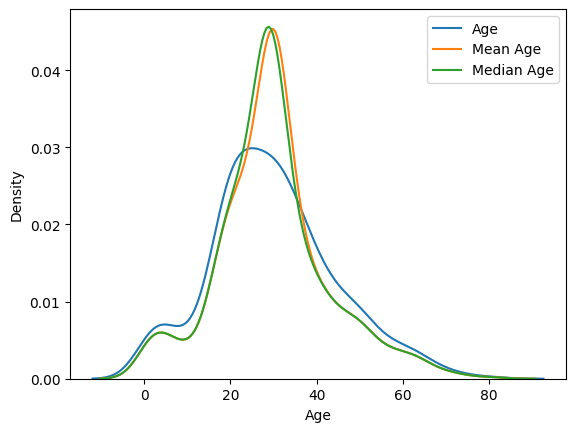

In [71]:
# Shape of Distribution of Original and Imputed Column
sns.kdeplot(X_train["Age"], label="Age")
sns.kdeplot(X_train["Age_Mean"], label="Mean Age")
sns.kdeplot(X_train["Age_Median"], label="Median Age")

plt.legend()
plt.show()

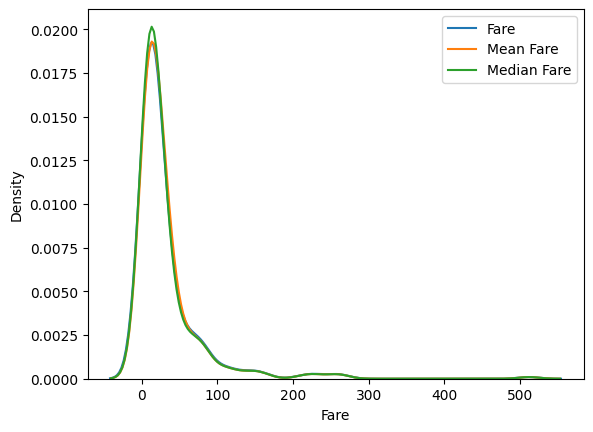

In [72]:
# Shape of Distribution of Original and Imputed Column
sns.kdeplot(X_train["Fare"], label="Fare")
sns.kdeplot(X_train["Fare_Mean"], label="Mean Fare")
sns.kdeplot(X_train["Fare_Median"], label="Median Fare")

plt.legend()
plt.show()

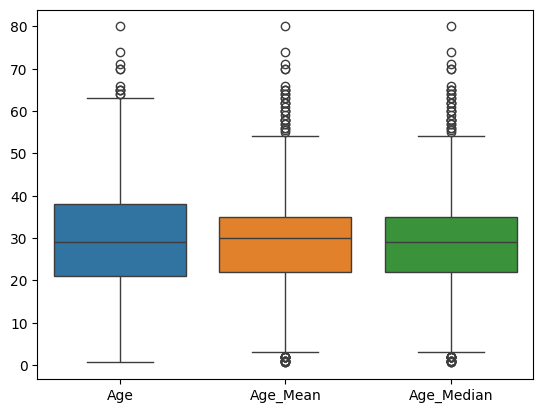

In [73]:
# Outliers in Original and Imputed Column
sns.boxplot(X_train[["Age","Age_Mean","Age_Median"]])
plt.show()

<Axes: >

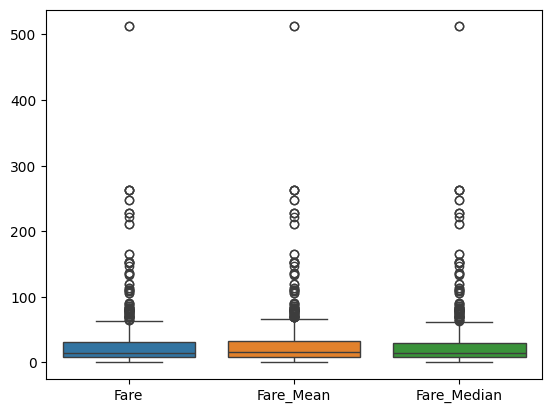

In [74]:
# Outliers in Original and Imputed Column
sns.boxplot(X_train[["Fare","Fare_Mean","Fare_Median"]])

In [75]:
# Correlation of Columns in the DataFrame
X_train.corr()

,Age,Fare,Family,Age_Mean,Age_Median,Fare_Mean,Fare_Median
Age,1.000000,0.110340,-0.291393,1.000000,1.000000,0.108883,0.111695
Fare,0.110340,1.000000,0.194507,0.105208,0.108360,1.000000,1.000000
Family,-0.291393,0.194507,1.000000,-0.233875,-0.232979,0.192384,0.193970
Age_Mean,1.000000,0.105208,-0.233875,1.000000,0.999517,0.103371,0.106132
Age_Median,1.000000,0.108360,-0.232979,0.999517,1.000000,0.106483,0.109098
Fare_Mean,0.108883,1.000000,0.192384,0.103371,0.106483,1.000000,0.996976
Fare_Median,0.111695,1.000000,0.193970,0.106132,0.109098,0.996976,1.000000


In [76]:
# Covariance of Columns in the DataFrame
X_train.cov()

,Age,Fare,Family,Age_Mean,Age_Median,Fare_Mean,Fare_Median
Age,211.500543,86.868369,-6.347821,211.500543,211.500543,82.521059,84.981724
Fare,86.868369,2534.702016,16.579502,69.418053,71.542171,2534.702016,2534.702016
Family,-6.347821,16.579502,2.788746,-5.082339,-5.065321,15.779847,15.958149
Age_Mean,211.500543,69.418053,-5.082339,169.336448,169.336448,66.069916,68.040030
Age_Median,211.500543,71.542171,-5.065321,169.336448,169.500098,68.091584,69.975296
Fare_Mean,82.521059,2534.702016,15.779847,66.069916,68.091584,2412.449507,2412.449507
Fare_Median,84.981724,2534.702016,15.958149,68.040030,69.975296,2412.449507,2427.105574


<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">Missing Numerical Imputation - Using Sklearn
    </p>
</div>

---

In [77]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3)

In [78]:
# Importing SimpleImputer
from sklearn.impute import SimpleImputer

In [79]:
# Creating SimpleImputer Object for Mean and Median Imputation
imputer1 = SimpleImputer(strategy="mean")
imputer2 = SimpleImputer(strategy="median")

In [80]:
# Importing ColumnTransformer
from sklearn.compose import ColumnTransformer

In [81]:
# ColumnTransformer on Age and Fare Column
tnf = ColumnTransformer(transformers=[
    ("median_age", imputer2, ["Age"]),
    ("mean_fare", imputer1, ["Fare"])
], remainder="passthrough")

In [82]:
# Fitting and Transforming Training Data Only
X_train_transformed = tnf.fit_transform(X_train)

In [83]:
# Transforming Testing Data
X_test_transformed = tnf.transform(X_test)

In [84]:
# Parameter for Finding the Mean and Median used for Imputation
tnf.named_transformers_["median_age"].statistics_

array([28.])

In [85]:
# Parameter for Finding the Mean and Median used for Imputation
tnf.named_transformers_["mean_fare"].statistics_

array([33.76819495])